In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

##**Задание**


---
##**Task**

Реализуйте базовую модель логистической регрессии для классификации текстовых  
сообщений (используемые данные [здесь](https://github.com/DurinPavel/classification_text_messages/blob/main/spam.csv)) по признаку спама. Для этого:
1. Приведите весь текст к нижнему регистру;  
2. Удалите мусорные символы;  
3. Удалите стоп-слова;  
4. Приведите все слова к нормальной форме;  
5. Преобразуйте все сообщения в вектора TF-IDF;
6. Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите  
random_state=42. Используйте train_test_split;  
7. Постройте модель логистической регрессии, укажите random_state=42, оцените  
ее точность на тестовых данных;
8. Опишите результаты при помощи confusion_matrix;
9. Постройте датафрейм, который будет содержать все исходные тексты сообщений,  
классифицированные неправильно (с указанием фактического и предсказанного).


---
Implement a basic logistic regression model for text
message classification (data used [here](https://github.com/DurinPavel/classification_text_messages/blob/main/spam.csv)) based on spam. For this:
1. Reduce the entire text to lowercase;  
2. Remove junk symbols;  
3. Delete stop words;  
4. Bring all the words to normal form;  
5. Convert all messages to TF-IDF vectors;
6. Divide the data into test and training data in a ratio of 30/70, specify  
random_state=42. Use train_test_split;  
7. Build a logistic regression model, specify random_state=42, estimate  
its accuracy is based on test data;
8. Describe the results using confusion_matrix;
9. Build a dataframe that will contain all the original texts of messages
classified incorrectly (indicating the actual and predicted).

In [50]:
# Загрузим наши данные, для удобства переименуем столбцы:
# -----------------------------------------------------------------------------
# Upload our data, rename the columns for convenience:

df = pd.read_csv('spam.csv',
                 header=0,
                 names=['Категория', 'Сообщение'])
df.head()

,Категория,Сообщение
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
# Приведем все слова к нижнему регистру:
# -----------------------------------------------------------------------------
# Reduce all words to lowercase:

texts_lower_case = [text.lower() for text in df['Сообщение']]
print(texts_lower_case)

['go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...', 'ok lar... joking wif u oni...', "free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's", 'u dun say so early hor... u c already then say...', "nah i don't think he goes to usf, he lives around here though", "freemsg hey there darling it's been 3 week's now and no word back! i'd like some fun you up for it still? tb ok! xxx std chgs to send, £1.50 to rcv", 'even my brother is not like to speak with me. they treat me like aids patent.', "as per your request 'melle melle (oru minnaminunginte nurungu vettam)' has been set as your callertune for all callers. press *9 to copy your friends callertune", 'winner!! as a valued network customer you have been selected to receivea £900 prize reward! to claim call 09061701461. claim code kl341. valid 12 hours only.', 'had your mobile 

In [52]:
# Уберем все служебные символы и цифры:
# -----------------------------------------------------------------------------
# Remove all service symbols and numbers:

only_words_text = [re.sub('[\W_\d]+', ' ', text) for text in texts_lower_case]
print(only_words_text)

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat ', 'ok lar joking wif u oni ', 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s', 'u dun say so early hor u c already then say ', 'nah i don t think he goes to usf he lives around here though', 'freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv', 'even my brother is not like to speak with me they treat me like aids patent ', 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press to copy your friends callertune', 'winner as a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hours only ', 'had your mobile months or more u r entitled to update to the latest colour mobiles with camera for free call the 

In [53]:
# Токенизируем - разделим на отдельные слова:
# -----------------------------------------------------------------------------
# Tokenize - divide into separate words:

texts_splitted = [text.split() for text in only_words_text]
print(texts_splitted)

[['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat'], ['ok', 'lar', 'joking', 'wif', 'u', 'oni'], ['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's'], ['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say'], ['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though'], ['freemsg', 'hey', 'there', 'darling', 'it', 's', 'been', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'i', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'to', 'rcv'], ['even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me', 'like', 'aids', 'patent'], ['as', 'per', 'your', 'r

In [54]:
# Удалим стоп-слова и слова из одной буквы:
# -----------------------------------------------------------------------------
# Remove stop words and words from the same letter:

nltk.download('stopwords')
stopwords_set = set(stopwords.words('english'))
without_sw = [[word for word in text if len(word) > 1 \
               and word not in stopwords_set] for text in texts_splitted]
print(without_sw)

[['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'la', 'buffet', 'cine', 'got', 'amore', 'wat'], ['ok', 'lar', 'joking', 'wif', 'oni'], ['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'apply'], ['dun', 'say', 'early', 'hor', 'already', 'say'], ['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though'], ['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv'], ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent'], ['per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', 'copy', 'friends', 'callertune'], ['winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl', 'valid', 'hours'], ['mobile', 'months', 'entitled', 'update', 'latest', 'col

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
# Лемманизируем - приведем все слова к нормальной форме:
# -----------------------------------------------------------------------------
# # Lemmatize - let 's bring all the words to normal form:

nltk.download('omw-1.4')
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_text = [[wordnet_lemmatizer.lemmatize(word) for word in text] \
                   for text in without_sw]
print(lemmatized_text)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'la', 'buffet', 'cine', 'got', 'amore', 'wat'], ['ok', 'lar', 'joking', 'wif', 'oni'], ['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'apply'], ['dun', 'say', 'early', 'hor', 'already', 'say'], ['nah', 'think', 'go', 'usf', 'life', 'around', 'though'], ['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv'], ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'], ['per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'caller', 'press', 'copy', 'friend', 'callertune'], ['winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl', 'valid', 'hour'], ['mobile', 'month', 'entitled', 'update', 'latest', 'colour', 'm

In [56]:
# Вернем все к простому списку:
# -----------------------------------------------------------------------------
# Let's return everything to a simple list:

text_list = [' '.join(text) for text in lemmatized_text]
print(text_list)

['go jurong point crazy available bugis great world la buffet cine got amore wat', 'ok lar joking wif oni', 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate apply', 'dun say early hor already say', 'nah think go usf life around though', 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv', 'even brother like speak treat like aid patent', 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune', 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour', 'mobile month entitled update latest colour mobile camera free call mobile update co free', 'gonna home soon want talk stuff anymore tonight cried enough today', 'six chance win cash pound txt csh send cost day day tsandcs apply reply hl info', 'urgent week free membership prize jackpot txt word claim www dbuk net lccltd pobox ldnw rw', 'searching right word thank breath

In [57]:
# Преобразуем сообщения в вектора TF-IDF:
# -----------------------------------------------------------------------------
# Convert messages to TF-IDF vectors:

tfidf = TfidfVectorizer(use_idf=True)
tfidf_matrix = tfidf.fit_transform(text_list)
names = tfidf.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [58]:
# Разделим наши данные на тестовые и тренировочные:
# -----------------------------------------------------------------------------
# Let's divide our data into test and training:

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix,
                                                    df['Категория'].values,
                                                    test_size = 0.30,
                                                    random_state = 42)

In [59]:
# Построим модель логистической регрессии:
# -----------------------------------------------------------------------------
# Let's build a logistic regression model:

lr = LogisticRegression(random_state=42)

In [60]:
# Обучим нашу модель:
# -----------------------------------------------------------------------------
# Let's train our model:

lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [61]:
# Сделаем предсказания:
# -----------------------------------------------------------------------------
# Make predictions:

lr.predict(X_test)

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype=object)

In [62]:
# Оценим точность модели:
# -----------------------------------------------------------------------------
# Let's evaluate the accuracy of the model:

accuracy_score(y_test, lr.predict(X_test)).round(2)

0.96

*Видим, что модель работает достаточно хорошо.  
Точность предсказаний 96 %.*


---
*We see that the model works quite well.  
The accuracy of predictions is 96%.*

In [63]:
# Построим матрицу ошибок:
# -----------------------------------------------------------------------------
# Let's build a matrix of errors:

c_matrix = confusion_matrix(y_test, lr.predict(X_test))
print(c_matrix)

[[1445    3]
 [  64  160]]


*Из данной матрицы мы видим, что 1445 - это число верно предсказанных  
сообщений, которые не являются спамом; 160 - число верно предсказанных  
сообщений, которые являются спамом; 3 - число ошибочно предсказанных  
сообщений, которые не являются спамом; 64 - число ошибочно предсказанных  
сообщений, которые являются спамом.*  


---
*From this matrix, we see that 1445 is the number of correctly predicted  
messages that are not spam; 160 is the number of correctly predicted  
messages that are spam; 3 is the number of erroneously predicted  
messages that are not spam; 64 is the number of erroneously predicted  
messages that are spam.*

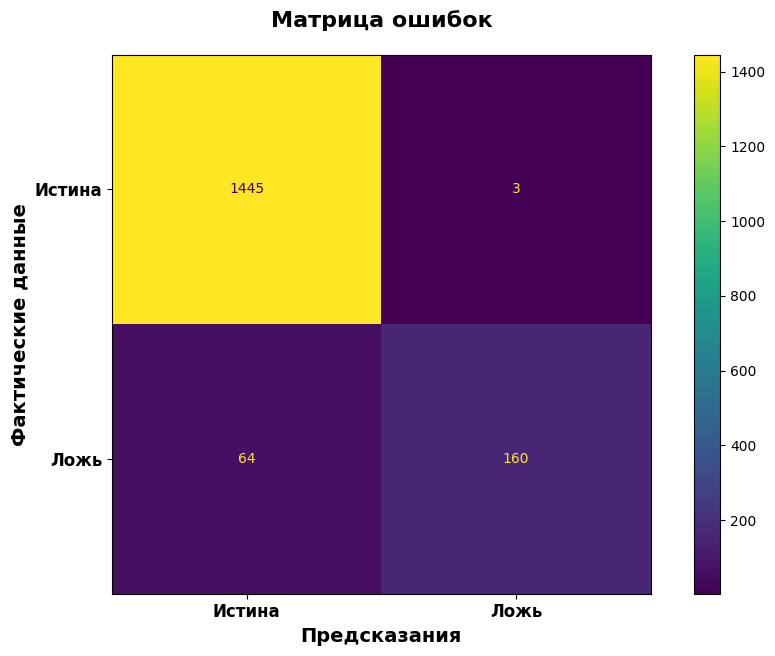

In [64]:
# Визуализируем нашу матрицу:
# -----------------------------------------------------------------------------
# Visualize our matrix:

cm_display = ConfusionMatrixDisplay(confusion_matrix = c_matrix,
                                    display_labels = ['Истина', 'Ложь'])

cm_display.plot()
plt.title('Матрица ошибок', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Предсказания', fontsize=14, fontweight='bold')
plt.ylabel('Фактические данные', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()

In [65]:
# Посмотрим разницу факта и прогноза:
# -----------------------------------------------------------------------------
# Let's see the difference between the fact and the forecast:

result = pd.DataFrame([y_test, lr.predict(X_test)]).T
result.columns = ['Факт', 'Прогноз']
result = result.loc[result['Факт'] != result['Прогноз']]
result.head()

,Факт,Прогноз
17,ham,spam
40,spam,ham
47,spam,ham
74,spam,ham
84,spam,ham


In [66]:
# Построим датафрейм, который будет содержать все исходные тексты сообщений,
# классифицированные неправильно:
# -----------------------------------------------------------------------------
# Let's build a dataframe that will contain all the source texts of messages,
# classified incorrectly:

mispredicted = pd.merge(result, df['Сообщение'],
                        left_index=True, right_index=True)
mispredicted.head()

,Факт,Прогноз,Сообщение
17,ham,spam,Eh u remember how 2 spell his name... Yes i di...
40,spam,ham,Pls go ahead with watts. I just wanted to be s...
47,spam,ham,"Fair enough, anything going on?"
74,spam,ham,U can call me now...
84,spam,ham,Yup next stop.
